# BS pricing using Implicit Euler finite difference method

First let's recall the Black Scholes PDE

\begin{align}
\frac{∂V(t, S)}{∂t} + rS\frac{∂V(t, S)}{∂S} + \frac{1}{2}σ^2S^2\frac{∂^2V(t, S)}{∂S^2} - rV(t, S) = 0.  \nonumber
\end{align}

To work in the log-space, $log(S) = x$ we can apply the following change of variable

\begin{align}
&\frac{∂}{∂x}  = S\frac{∂}{∂S} \nonumber \\ \nonumber
\frac{∂^2}{∂x^2} &- \frac{∂}{∂x} = S^2\frac{∂^2}{∂S^2} \nonumber
\end{align}

which transforms the BS PDE into

\begin{align}
\frac{∂V(t, x)}{∂t} + (r - \frac{1}{2} σ^2) \frac{∂V(t, x)}{∂x} + \frac{1}{2}σ^2\frac{∂^2V(t, x)}{∂x^2} - rV(t, x) = 0.  
\end{align}

The boundary conditions for an option with strike K and maturity T are

Call:
1. Terminal 
\begin{align}
V(T, x) = max(𝑒^x - K, 0) \nonumber
\end{align}
1. Side 
\begin{align}
V(t, x) \underset{x \to -\infty} = 0 \quad , \quad V(t, x) \underset{x \to \infty} \sim 𝑒^x - K𝑒^{-r(T-t)} \nonumber
\end{align}

Put:
1. Terminal 
\begin{align}
V(T, x) = max(K - 𝑒^x, 0) \nonumber
\end{align}
2. Side 
\begin{align}
V(t, x) \underset{x \to \infty} = 0 \quad , \quad V(t, x) \underset{x \to -\infty} \sim K𝑒^{-r(T-t)} \nonumber
\end{align}

## Finite Difference Methods

Finite Difference Methods allow to approximate partial derivatives with finite difference approximations. If we assume that $V$ is a smooth function, expanding $V$ via Taylor series we can obtain 
1. BACKWARD DIFFERENCE
\begin{align}
\frac{∂V(t, x)}{∂t} \approx \frac{ V(t, x) - V(t - \Delta t, x)}{\Delta t} + \mathcal{O}(\Delta t)  \nonumber 
\end{align}
2. FIRST ORDER CENTRAL DIFFERENCE

\begin{align}
\frac{∂V(t, x)}{∂x} \approx \frac{ V(t, x + \Delta x) - V(t, x - \Delta x)}{2\Delta x} + \mathcal{O}(\Delta x^2).   \nonumber
\end{align}

3. SECOND ORDER CENTRAL DIFFERENCE
\begin{align}
\frac{∂^2V(t, x)}{∂x^2} \approx \frac{ V(t, x + \Delta x) - 2V(t, x) + V(t, x - \Delta x)}{\Delta x^2} + \mathcal{O}(\Delta x^2).   \nonumber
\end{align}

Now, we first define a grid formed by two finite regions $[t_0, T] \mathrm{x} [A_1, A_2]$ with $A_1<A_2$ and the discrete timestep $\Delta t = \frac{T-t_0}{N}$, for $n = 0,1,..., N$ such that $t_n = t_0 + n\Delta t$, and the discrete space step $\Delta x = \frac{A_2 - A_1}{M}$, for $i = 0,1,...,M$ such that $x_i = A_1 + i\Delta x$. The grid will have equally space nodes of distance $\Delta x$ in the x-axis and of distance $\Delta t$ in the t-axis. 

Then, define 

\begin{align}
V(t_0 + nΔt, A_1 + iΔx) = V^n_i \nonumber
\end{align}

and replace the partial derivatives in Eq (1) with the corresponding finite difference method

\begin{align}
\frac{V^{n+1}_i - V^{n}_i}{Δt} + (r-\frac{1}{2}σ^2)\frac{V^{n}_{i+1} - V^{n}_{i-1}}{2\Delta x} + \frac{1}{2}σ^2 \frac{V^{n}_{i+1} - 2V^{n}_i + V^{n}_{i-1}}{\Delta x^2} 
- rV^n_i = 0. \nonumber
\end{align}

Rearranging the terms and isolating $V^{n+1}_i$ we obtain

\begin{align}
V_i^{n+1} & =V_i^n\left(1+r \Delta t+\sigma^2 \frac{\Delta t}{\Delta x^2}\right) \nonumber \\
& +V_{i+1}^n\left(-\left(r-\frac{1}{2} \sigma^2\right) \frac{\Delta t}{2 \Delta x}-\frac{1}{2} \sigma^2 \frac{\Delta t}{\Delta x^2}\right) \nonumber \\
& +V_{i-1}^n\left(\left(r-\frac{1}{2} \sigma^2\right) \frac{\Delta t}{2 \Delta x}-\frac{1}{2} \sigma^2 \frac{\Delta t}{\Delta x^2}\right) \nonumber \\
& = a V_{i-1}^n + bV_i^n + c V_{i+1}^n,
\end{align}

which can be written in matrix form as 
\begin{align}
\left(\begin{array}{c}
V_1^{n+1} \\
V_2^{n+1} \\
\vdots \\
V_{M-2}^{n+1} \\
V_{M-1}^{n+1}
\end{array}\right)=\underbrace{\left(\begin{array}{ccccc}
b & c & 0 & \cdots & 0 \\
a & b & c & 0 & 0 \\
0 & \ddots & \ddots & \ddots & 0 \\
\vdots & 0 & a & b & c \\
0 & 0 & 0 & a & b
\end{array}\right)}_{\mathcal{D}} \cdot\left(\begin{array}{c}
V_1^n \\
V_2^n \\
\vdots \\
V_{M-2}^n \\
V_{M-1}^n
\end{array}\right)+\underbrace{\left(\begin{array}{c}
a V_0^n \\
0 \\
\vdots \\
c V_M^n
\end{array}\right)}_{\text {B (boundary terms) }}
\end{align}

where the system 

\begin{align}
V^{n+1}  = \mathcal{D} V^n + B \nonumber
\end{align}

can be solved for $V^n$ by inverting the matrix $\mathcal{D}$.


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline

from scipy import sparse

from scipy.sparse.linalg import spsolve

In [43]:
Maturity = 1
K = 100
r = 0.03
sig = 0.2
option_type = "call"
S0 = 100
X0 = np.log(S0)

# Numer of (M) Asset price steps and (N) time steps
NAsset = 1000
Ntime = 1000

# Twice or three times the strike is enough to approximate Infinity.
# 3*K allows to have a max value of S that has very low probability to be reached
S_max = float(K) * 3 
S_min = float(K) / 3

x_max = np.log(S_max)
x_min = np.log(S_min)

x, dx = np.linspace(x_min, x_max, NAsset, retstep=True)  # space discretization
T, dt = np.linspace(0, Maturity, Ntime, retstep=True)  # time discretization

V= np.zeros((NAsset, Ntime)) # Output
boundaries = np.zeros((NAsset-2)) # Vector that includes boundary conditions

if option_type == "call":
    Payoff = np.maximum(( np.exp(x) - K), 0)
    side_boundary = np.exp(x_max) - K * np.exp(-r * T[::-1])

elif option_type == "put":
    Payoff = np.maximum((K - np.exp(x)), 0)
    side_boundary = K * np.exp(-r * T[::-1])

else:
    raise ValueError("Choose between put and call")
   # Payoff, q adjusts for call or put option



V[:, -1] = Payoff # The last columns of each row (value of S) is set to the corresponding payoff (terminal condition)
V[-1, :] =  side_boundary # Set the last row (S = S_max) to the side boundary condition
V[0, :] = 0 # Initial condition

# Tri-diagonal Matrix D

sig_sq = sig*sig
dx_sq = dx*dx

a = (dt / 2) * ((r - 0.5 * sig_sq) / dx - sig_sq / dx_sq)
b = 1 + dt * (sig_sq / dx_sq + r)
c = -(dt / 2) * ((r - 0.5 * sig_sq) / dx + sig_sq / dx_sq)

D = sparse.diags([a, b, c], [-1, 0, 1], shape = (NAsset - 2, NAsset-2)).tocsc()
# Equivalent to:
# D = np.diag([b]*(Nspace-2), 0) + np.diag([a]*(Nspace-3), -1) + np.diag([c]*(Nspace-3), 1)

# Iterate backward from the last timestep to 0
for i in range(Ntime - 2, -1, -1):
    # Ensures the boundary conditions are kept the same
    boundaries[0] = a * V[0, i]
    boundaries[-1] = c * V[-1, i]
    # solve column i using the values from column i+1
    # This is equivalent to computing the inverse of D
    # V[1:-1, i] = D_inv * (V[1:-1, i+1] - boundaries)
    V[1:-1, i] = spsolve(D, (V[1:-1, i+1] - boundaries))

In [44]:
# Compute the option price at S0 (or any other values of S) based on the values at time t=0
Price = np.interp(X0, x, V[:,0])
Price

9.41252367516847

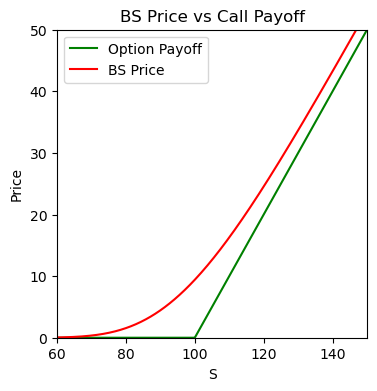

In [45]:
# Plot BS price vs payoff

fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(111)
ax.plot(np.exp(x), Payoff, color = "green", label = "Option Payoff")
ax.plot(np.exp(x), V[:, 0], color = "red", label = "BS Price")
ax.set_xlim(60,150)
ax.set_ylim(0,50)
ax.set_xlabel("S")
ax.set_ylabel("Price")
ax.legend(loc = "upper left")
ax.set_title("BS Price vs Call Payoff")
plt.show()

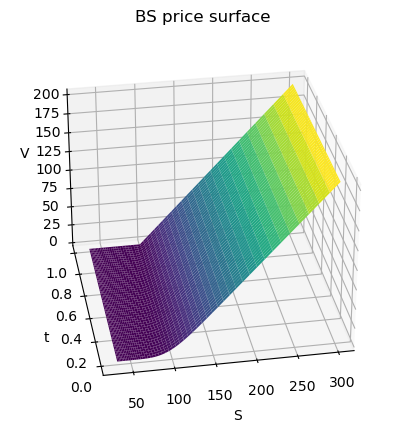

In [46]:
# Plot Price surface 
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection = "3d")
X, Y = np.meshgrid(T, np.exp(x))
ax.plot_surface(Y, X, V, cmap="viridis")
ax.set_title("BS price surface")
ax.set_xlabel("S")
ax.set_ylabel("t")
ax.set_zlabel("V")
ax.view_init(30, -100)  # rotate the plot
plt.show()